<a href="https://colab.research.google.com/github/aka-hombre/MAT422/blob/main/MAT422_HW1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
import random
import pandas
from IPython.display import display, Latex
from sympy import *

In [42]:
#Helper functions!

def matdisp(*matrix):
    parent_str = ''

    for A in matrix:
        if isinstance(A, str):
            parent_str += A
            continue

        # Ensure the input is a NumPy array
        A = np.array(A)

        # Create a formatted LaTeX string for the matrix
        A_str = r'\begin{bmatrix}'

        # Check if A is a vector (1D array)
        if A.ndim == 1:  # If it's a vector
            for x in A:
                # Append each element as a new row
                if isinstance(x, int):
                    A_str += f'{x:d} \\\\ '
                elif isinstance(x, float):
                    A_str += f'{x:.2f} \\\\ '  # Format floats to 2 decimal places
                else:
                    A_str += f'{str(x)} \\\\ '  # Fallback to string representation for other types
        else:  # Handle 2D arrays
            for row in A:
                row_str = []
                for x in row:
                    if isinstance(x, int):
                        row_str.append(f'{x:d}')
                    elif isinstance(x, float):
                        row_str.append(f'{x:.2f}')  # Format floats to 2 decimal places
                    else:
                        row_str.append(str(x))  # Fallback to string representation for other types
                A_str += ' & '.join(row_str) + r' \\ '

        A_str += r'\end{bmatrix}'
        parent_str += A_str

    display(Latex(f'${parent_str}$'))

#1.4.1 - Singular value decomposition

Here we will use python to give an example of the process of QR decomposing a random matrix. This process is integral to PCA, so we will show an application in section 1.4.1

In [88]:
A = np.random.randint(10, size=(5,3)) #3x5 random integer matrix
matdisp(r'\text{Here is our matrix we will do a SVD on:}\\',A)

n, m = A.shape
#numpy can do svd!
U, S, VT = np.linalg.svd(A)
matdisp(r"\text{Let's see how our S looks}", S, r"\\ \text{It isn't a diagnal matrix! We will have to make it one}")

S = np.vstack((np.diag(S), zeros(2, 3)))
matdisp(r"\\A = U\Sigma V^T")
print()
matdisp(r'\\=', U, S, VT)
print()
SVT = np.matmul(S, VT)
print()
matdisp(r'\\=', U, SVT)
print()
Ai = np.matmul(U, SVT)
threshold = 5
# Round down elements in A that are greater than the threshold
Ai = np.where(A > threshold, np.floor(A), A)
matdisp(r'=', Ai)
print("\nOur results check out!")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


Our results check out!


#1.4.2 Low-rank matrix approximations

We will be doing an example of a a low-rank approximation by generating a random matrix, ploting the matrix as a color map, finding the approximation fo the matrix, and also plotting the colormap of the approximation.

<IPython.core.display.Latex object>


Low-Rank (Rank-2) Approximated Matrix:


<IPython.core.display.Latex object>

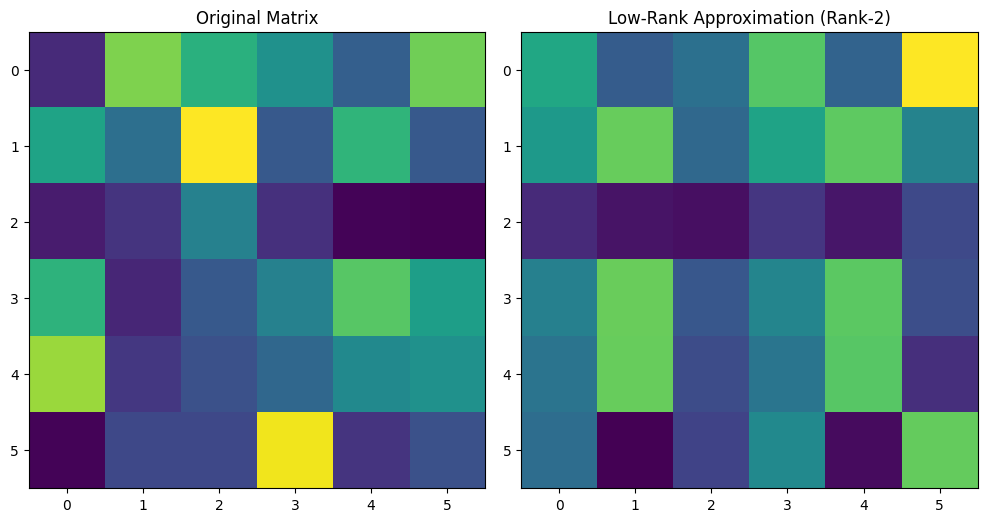

In [92]:
A = np.random.randint(0, 100, (6, 6))  # 6x6 random integer matrix
matdisp(r"A=",A)


U, S, VT = np.linalg.svd(A)
S = np.diag(S)

# Rank-2 approximation (you can adjust this value to get different ranks)
rank = 2
U_low_rank = U[:, :rank]
S_low_rank = S[:rank, :rank]
Vt_low_rank = Vt[:rank, :]

# Reconstruct the low-rank approximation
matrix_approx = np.dot(U_low_rank, np.dot(S_low_rank, Vt_low_rank))

print("\nLow-Rank (Rank-2) Approximated Matrix:")
matdisp(matrix_approx)

# Plotting the original and approximated matrices
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(A, cmap='viridis')
plt.title('Original Matrix')


plt.subplot(1, 2, 2)
plt.imshow(matrix_approx, cmap='viridis')
plt.title('Low-Rank Approximation (Rank-2)')


plt.tight_layout()
plt.show()

#1.4.3 Principal Component Analysis

Recall assuming $X = [\mathbf{X}_1, \mathbf{X}_2, \dots, \mathbf{X}_N]$ is a pxN matrix in mean derivation form. The goal in PCA, is to find $k, \  (k\leq p),$ orthanormal vectors $\mathbf{v}_1, \dots, \mathbf{v}_k$, that maximize the objective funciton
\begin{equation}
\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^k\langle\mathbf{X}_i \cdot \mathbf{v}_j\rangle^2
\end{equation}
where $\langle\mathbf{X}_i \cdot \mathbf{v}_J\rangle$ is the length of the projection of $\mathbf{X}_i$ onto $\mathbf{v}j$.


In, other words we seek to maximize the sum of the square distance of the projection of our $X$ vectors onto our orthanormal space. Since $k\leq p$ we are also trying to preserve as much of the "distinctness" of our vectors into the lower dimensional projection.

Our eigen vectors and eigen values capture this distinctness.

In this example we will be using data from the 2019 report on world happiness.

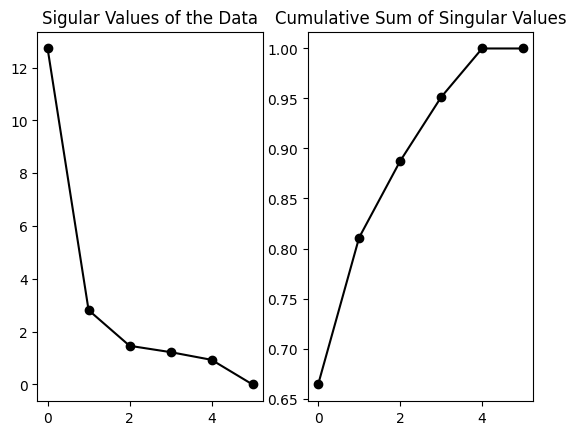

In [5]:
data = pandas.read_csv('2019.csv') #2019 data on world happiness

# Set the 'Country or region' column as the index and select numerical columns
numerical_data = data.set_index('Country or region').select_dtypes(include=['float64', 'int64'])

# Convert to NumPy array, starting at GDP score
X = data.iloc[:, 3:].values

# Keep track of the country names
countries = numerical_data.index.values

[p, N] = X.shape
M = np.sum(X, axis=1)/N #Mean Vector
B = np.zeros(X.shape) #Mean-derivation form matrix
#Constructing Mdev matrix
for i in range(N):
  B[:,i] = X[:,i] - M

U, S, VT = np.linalg.svd(B) #SVD of B


fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.plot(S, '-o', color='k')
ax1.title.set_text("Sigular Values of the Data")

ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S), '-o', color='k')
ax2.title.set_text('Cumulative Sum of Singular Values')


The cumulative sums of the data computed by
\begin{equation}
\frac{\sum_1^k\lambda_j}{\sum_1^p\lambda_j}
\end{equation}

 show that about 90% of the variance in the data could be explained by the first three principal component eigen vectors of the data set, and between 80%-85% with two. Let's figure out what the principal compenent vectors are saying.

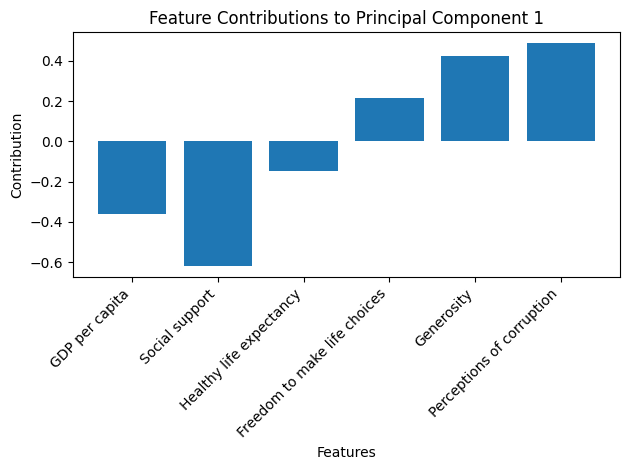

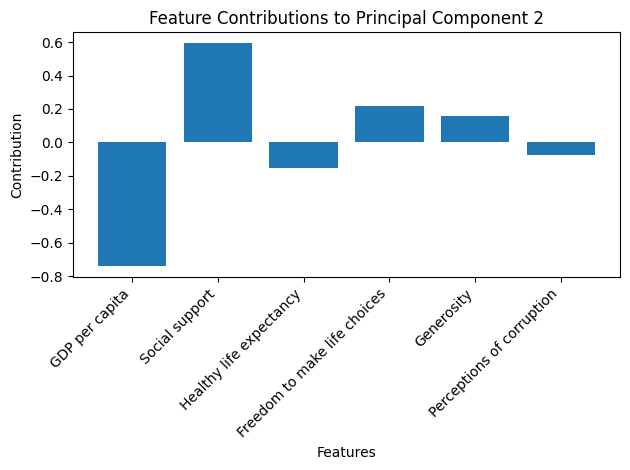

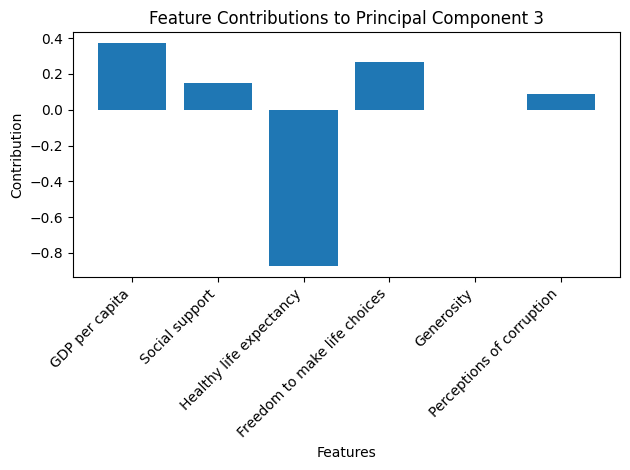

In [37]:
fig2i = plt.figure()
pltfigs = [111, 211, 311]

# Plot the contributions of each feature for the first 3 principal components
for i in range(3):  # We will plot for the first 3 principal components
    fig2i.add_subplot(pltfigs[i])
    plt.bar(numerical_data.columns[2:], VT[i, :])  # VT[i, :] contains the loadings for the ith principal component
    plt.title(f'Feature Contributions to Principal Component {i+1}')
    plt.xlabel('Features')
    plt.ylabel('Contribution')
    plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
    plt.tight_layout()
    plt.show()


As we can see social support, genorosity, and perceptions of corruptions are the main contributing factors to the variance in the first eigenvector. Let's say this sums up a social well being.

Next, we see GDP and social support as the ain contributing factors to the variance in the data, characterized by the second eigenvector. Let's call this individual well being.

Third, Healthy life expectancy is the dominate factor to contributing to the variance in the third eigenvector. Let's say this sums up as Health.

From this PCA, we can see social and individual well being, and healthy outcomes are the three principal components in determining a country's happiness.

